In [2]:
#import pandas as pd
#import numpy as np
#import matplotlib.pyplot as plt
#import seaborn as sns
#from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import StandardScaler
#from sklearn.linear_model import LogisticRegression
#from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

import pandas as pd
import numpy as np

# For ploting the graphs
import matplotlib.pyplot as plt
import seaborn as sns
import csv

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Machine learning Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# Machine learning model evaluation
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_curve, auc, confusion_matrix


from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

df=pd.read_csv("Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")

In [3]:
df.head(5)

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


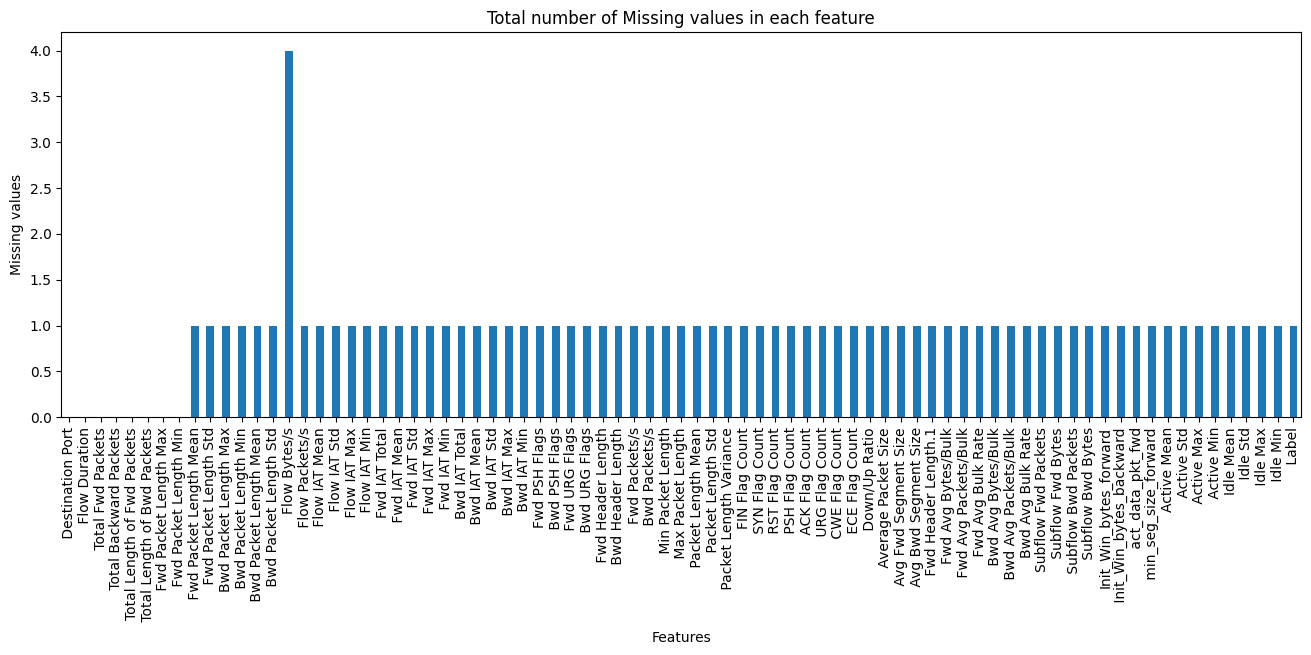

In [4]:
#Checking the null values in the dataset.
df.isna().sum()


def plotMissingValues(dataframe):
    missing_values = dataframe.isnull().sum()  # Counting null values for each column
    fig = plt.figure(figsize=(16, 5))
    missing_values.plot(kind='bar')
    plt.xlabel("Features")
    plt.ylabel("Missing values")
    plt.title("Total number of Missing values in each feature")
    plt.show()

plotMissingValues(df)

In [5]:
#Drop null values
data_new=df.dropna()

In [6]:
pd.set_option('use_inf_as_na', True)  # Treat inf as NaN
null_values=data_new.isnull().sum()  # Check for NaN values
data_new = data_new.dropna()


# handing infinite values
data_new.replace([np.inf, -np.inf], np.nan, inplace=True)
data_new.dropna(inplace=True)

<ipython-input-6-48273776bbd1>:1: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.set_option('use_inf_as_na', True)  # Treat inf as NaN


In [7]:
#observing data types of the columns
(data_new.dtypes=='object')

,0
Destination Port,False
Flow Duration,False
Total Fwd Packets,False
Total Backward Packets,False
Total Length of Fwd Packets,False
...,...
Idle Mean,False
Idle Std,False
Idle Max,False
Idle Min,False


In [8]:
# Clean column name spaces and enbcode label value
data_new.columns = data_new.columns.str.replace(' ', '')
data_new['Label'] = data_new['Label'].map({'BENIGN': 0, 'DDoS': 1})



In [9]:
df.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,40917.000000,4.091700e+04,40917.000000,40917.000000,40917.000000,4.091700e+04,40917.000000,40917.000000,40916.000000,40916.000000,...,40916.000000,40916.000000,4.091600e+04,4.091600e+04,4.091600e+04,4.091600e+04,4.091600e+04,4.091600e+04,4.091600e+04,4.091600e+04
mean,5070.775350,1.256916e+07,5.756629,5.776425,551.140357,7.420593e+03,219.301977,19.000073,68.979918,78.289533,...,3.761365,22.922084,1.384627e+05,2.968816e+04,1.914340e+05,1.214196e+05,6.505919e+06,1.800431e+06,7.783436e+06,5.208155e+06
std,14943.170176,2.808205e+07,20.857066,29.416679,3332.292839,5.192642e+04,963.294938,93.407463,273.427145,405.447834,...,16.030069,5.500277,9.008523e+05,3.806990e+05,1.151218e+06,8.594176e+05,1.640236e+07,8.095202e+06,1.938416e+07,1.510431e+07
min,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,53.000000,2.396600e+04,2.000000,1.000000,26.000000,6.000000e+00,6.000000,0.000000,6.000000,0.000000,...,1.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,80.000000,5.140950e+05,3.000000,2.000000,37.000000,2.060000e+02,20.000000,6.000000,8.666667,0.000000,...,2.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,80.000000,5.675759e+06,5.000000,5.000000,80.000000,1.160100e+04,45.000000,31.000000,41.000000,10.263203,...,3.000000,20.000000,4.000000e+00,0.000000e+00,4.000000e+00,4.000000e+00,5.085909e+06,0.000000e+00,5.085909e+06,5.048227e+06
max,61538.000000,1.199981e+08,1681.000000,2942.000000,120783.000000,4.991419e+06,11680.000000,1472.000000,3867.000000,6692.644993,...,1680.000000,52.000000,1.000000e+08,3.950000e+07,1.000000e+08,1.000000e+08,1.200000e+08,6.530000e+07,1.200000e+08,1.200000e+08


Split into Test and Train Data

In [13]:
# Split data into features and target variable
X = data_new.drop('Label', axis=1)
y = data_new['Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Training using Logistic Regression

In [14]:
from mlxtend.plotting import plot_confusion_matrix
# Train the logistic regression model on the standardized data
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
lr_pred = lr_model.predict(X_test_scaled)

# Evaluate the model
lr_accuracy = accuracy_score(y_test, lr_pred)
lr_f1 = f1_score(y_test, lr_pred)
lr_precision = precision_score(y_test, lr_pred)
lr_recall = recall_score(y_test, lr_pred)

print('\nLogistic Regression Metrics:')
print(f'Accuracy: {lr_accuracy:.4f}')
print(f'F1 Score: {lr_f1:.4f}')
print(f'Precision: {lr_precision:.4f}')
print(f'Recall: {lr_recall:.4f}')



Logistic Regression Metrics:
Accuracy: 0.9981
F1 Score: 0.9978
Precision: 0.9965
Recall: 0.9990


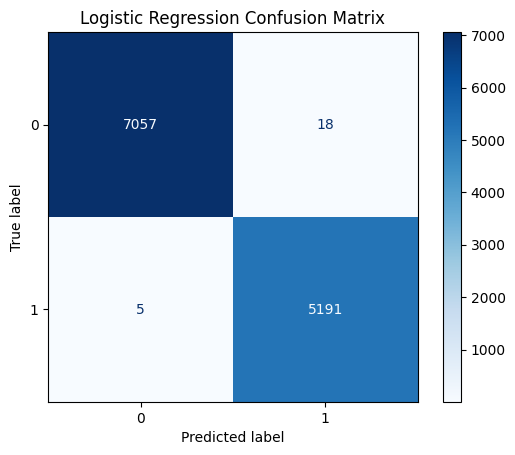

In [15]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute the confusion matrix
cm = confusion_matrix(y_test, lr_pred)

# Create a confusion matrix display
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Plot the confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.title('Logistic Regression Confusion Matrix')
plt.show()

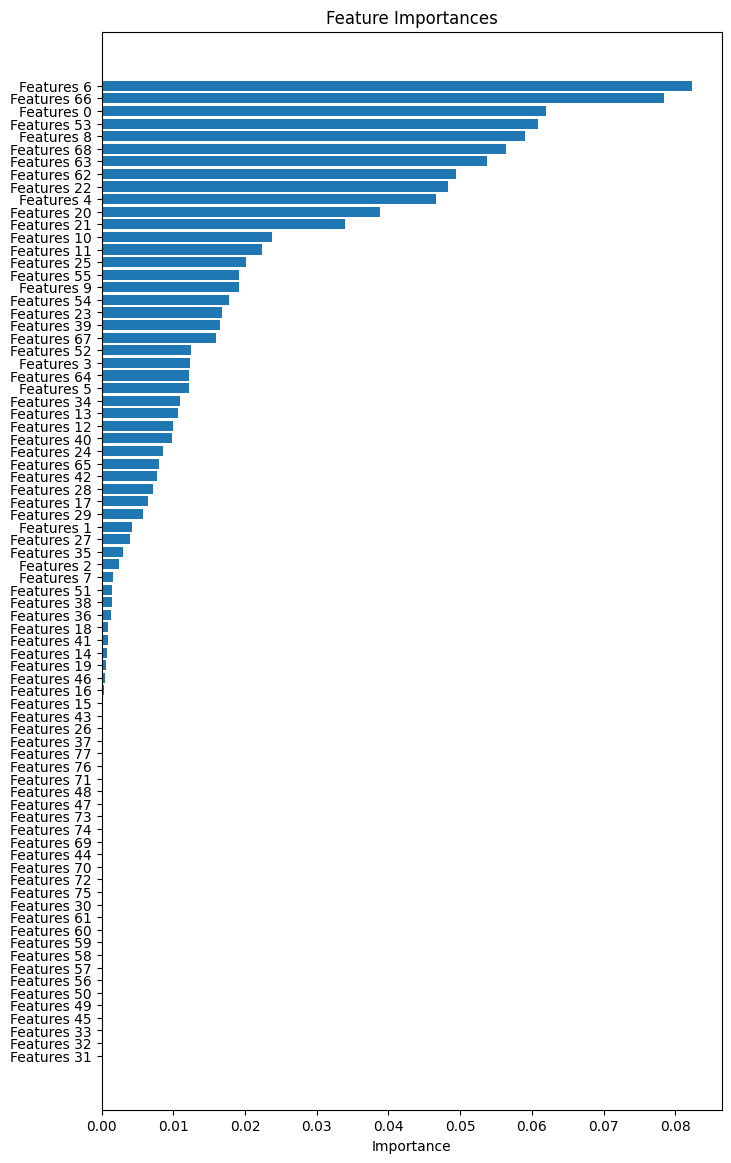

In [ ]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=50, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
# Getting feature importances from the trained model
importances = rf_model.feature_importances_

# Getting the indices of features sorted by importance
indices = sorted(range(len(importances)), key=lambda i: importances[i], reverse=False)
feature_names = [f"Features {i}" for i in indices]  # Replace with your column names

# Plotting feature importances horizontally
plt.figure(figsize=(8, 14))
plt.barh(range(X_train.shape[1]), importances[indices], align="center")
plt.yticks(range(X_train.shape[1]), feature_names)
plt.xlabel("Importance")
plt.title("Feature Importances")
plt.show()

In [ ]:
# Function to generate and display a detailed confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()


Random Forest Metrics:
Accuracy: 0.9999
F1 Score: 0.9999
Precision: 1.0000
Recall: 0.9998


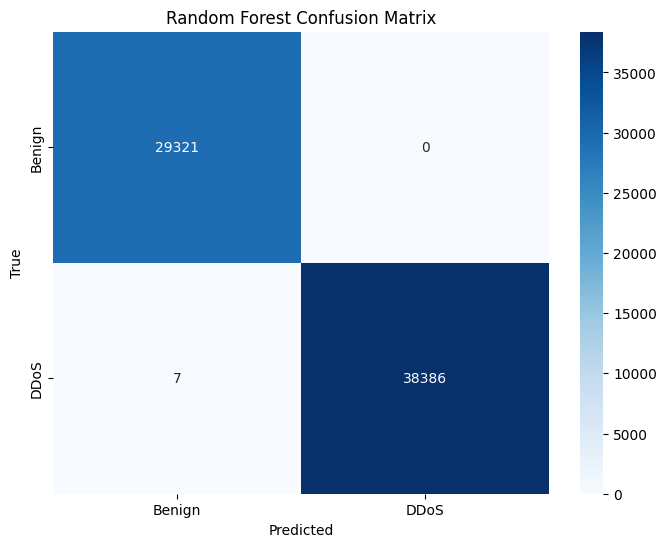

In [ ]:
# Evaluate Random Forest
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)

print('\nRandom Forest Metrics:')
print(f'Accuracy: {rf_accuracy:.4f}')
print(f'F1 Score: {rf_f1:.4f}')
print(f'Precision: {rf_precision:.4f}')
print(f'Recall: {rf_recall:.4f}')

# Confusion Matrix for Random Forest
plot_confusion_matrix(y_test, rf_pred, ['Benign', 'DDoS'], 'Random Forest Confusion Matrix')

NEURAL NETWORK

In [ ]:
nn_model = MLPClassifier(hidden_layer_sizes=(10,), max_iter=10, random_state=42)
nn_model.fit(X_train, y_train)
nn_pred = nn_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
nn_accuracy = accuracy_score(y_test, nn_pred)
nn_f1 = f1_score(y_test, nn_pred)
nn_precision = precision_score(y_test, nn_pred)
nn_recall = recall_score(y_test, nn_pred)

print('\nNeural Network Metrics:')
print(f'Accuracy: {nn_accuracy:.4f}')
print(f'F1 Score: {nn_f1:.4f}')
print(f'Precision: {nn_precision:.4f}')
print(f'Recall: {nn_recall:.4f}')


Neural Network Metrics:
Accuracy: 0.9807
F1 Score: 0.9830
Precision: 0.9855
Recall: 0.9804


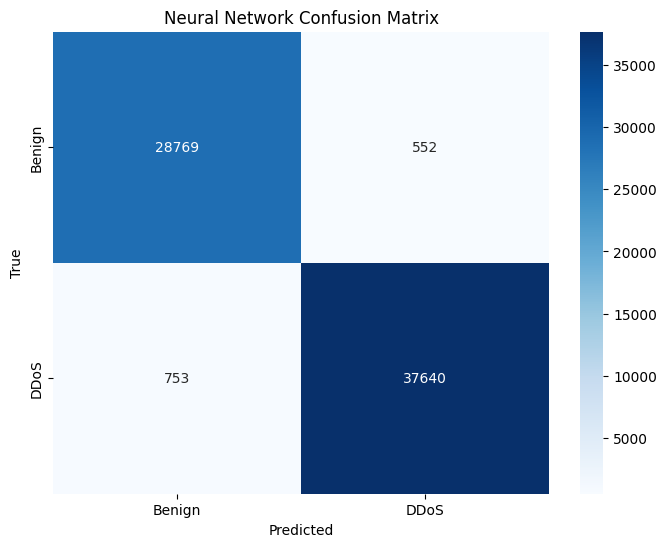

In [ ]:
# Confusion Matrix for Neural Network
plot_confusion_matrix(y_test, nn_pred, ['Benign', 'DDoS'], 'Neural Network Confusion Matrix')


Naive Bayes Metrics:
Accuracy: 0.9881
F1 Score: 0.9896
Precision: 0.9808
Recall: 0.9986


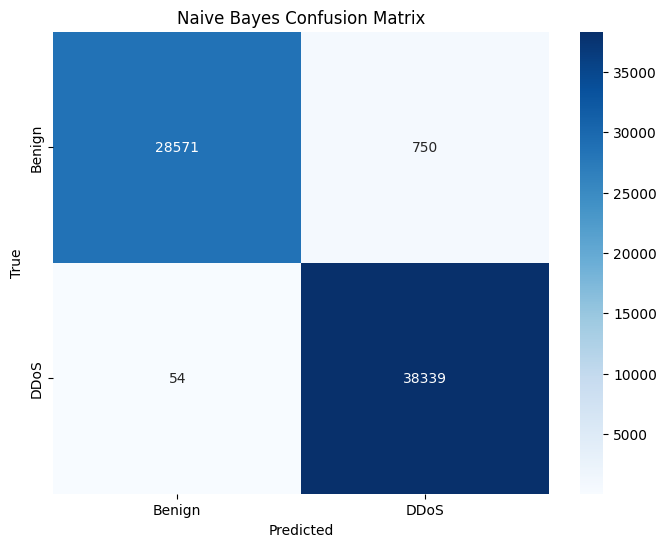

In [ ]:
# Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

# Make predictions
nb_pred = nb_model.predict(X_test_scaled)

# Evaluate Naive Bayes
nb_accuracy = accuracy_score(y_test, nb_pred)
nb_f1 = f1_score(y_test, nb_pred)
nb_precision = precision_score(y_test, nb_pred)
nb_recall = recall_score(y_test, nb_pred)

print('\nNaive Bayes Metrics:')
print(f'Accuracy: {nb_accuracy:.4f}')
print(f'F1 Score: {nb_f1:.4f}')
print(f'Precision: {nb_precision:.4f}')
print(f'Recall: {nb_recall:.4f}')

# Confusion Matrix for Naive Bayes
plot_confusion_matrix(y_test, nb_pred, ['Benign', 'DDoS'], 'Naive Bayes Confusion Matrix')



K-Nearest Neighbors Metrics:
Accuracy: 0.9997
F1 Score: 0.9998
Precision: 0.9998
Recall: 0.9998


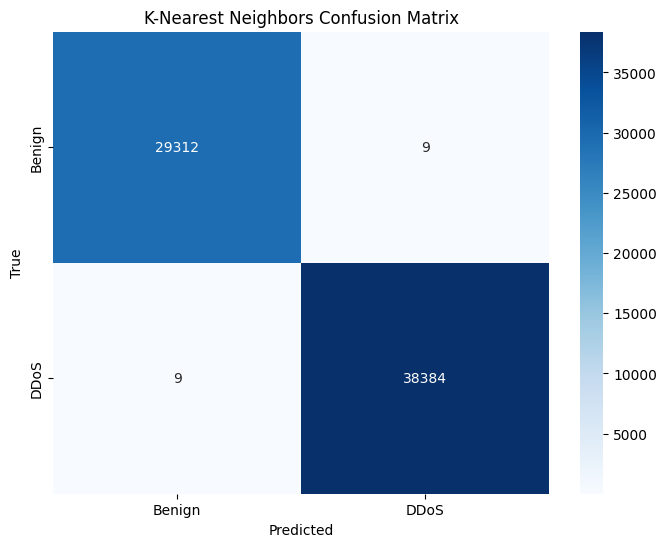

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# K-Nearest Neighbors Classifier
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can tune 'n_neighbors' as needed
knn_model.fit(X_train_scaled, y_train)

# Make predictions
knn_pred = knn_model.predict(X_test_scaled)

# Evaluate KNN
knn_accuracy = accuracy_score(y_test, knn_pred)
knn_f1 = f1_score(y_test, knn_pred)
knn_precision = precision_score(y_test, knn_pred)
knn_recall = recall_score(y_test, knn_pred)

print('\nK-Nearest Neighbors Metrics:')
print(f'Accuracy: {knn_accuracy:.4f}')
print(f'F1 Score: {knn_f1:.4f}')
print(f'Precision: {knn_precision:.4f}')
print(f'Recall: {knn_recall:.4f}')

# Confusion Matrix for KNN
plot_confusion_matrix(y_test, knn_pred, ['Benign', 'DDoS'], 'K-Nearest Neighbors Confusion Matrix')

# Get probabilities for ROC curve (use predict_proba)



Support Vector Machine (SVM) Metrics:
Accuracy: 0.9984
F1 Score: 0.9986
Precision: 0.9986
Recall: 0.9986


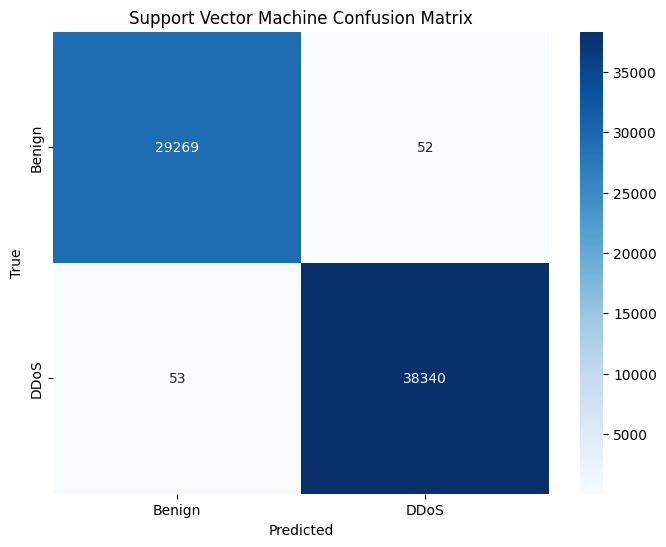

In [ ]:
# Train Support Vector Machine (SVM)
from sklearn.svm import SVC


svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Make predictions
svm_pred = svm_model.predict(X_test_scaled)

# Evaluate SVM
svm_accuracy = accuracy_score(y_test, svm_pred)
svm_f1 = f1_score(y_test, svm_pred)
svm_precision = precision_score(y_test, svm_pred)
svm_recall = recall_score(y_test, svm_pred)

print('\nSupport Vector Machine (SVM) Metrics:')
print(f'Accuracy: {svm_accuracy:.4f}')
print(f'F1 Score: {svm_f1:.4f}')
print(f'Precision: {svm_precision:.4f}')
print(f'Recall: {svm_recall:.4f}')

# Confusion Matrix for SVM
plot_confusion_matrix(y_test, svm_pred, ['Benign', 'DDoS'], 'Support Vector Machine Confusion Matrix')


PERFORMANCE COMPARISON

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


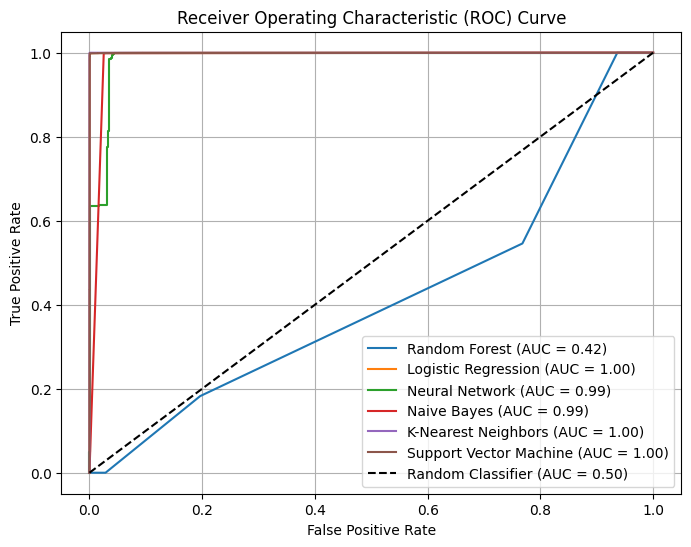

In [62]:
rf_proba = rf_model.predict_proba(X_test_scaled)

# Logistic Regression
lr_proba = lr_model.predict_proba(X_test_scaled)

# Naive Bayes
nb_proba = nb_model.predict_proba(X_test_scaled)

# KNN
knn_proba = knn_model.predict_proba(X_test_scaled)

# Neural Network
nn_proba = nn_model.predict_proba(X_test_scaled)

# SVM
svm_proba = svm_model.predict_proba(X_test_scaled)

# Combine predictions for ROC curve

# Random Forest ROC Curve
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_proba[:, 1])
rf_auc = auc(rf_fpr, rf_tpr)

# Logistic Regression ROC Curve
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_proba[:, 1])
lr_auc = auc(lr_fpr, lr_tpr)

#  Neural Network ROC Curve
nn_fpr, nn_tpr, _ = roc_curve(y_test, nn_proba[:, 1])
nn_auc = auc(nn_fpr, nn_tpr)

# Naive Bayes ROC Curve
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_proba[:, 1])
nb_auc = auc(nb_fpr, nb_tpr)

# KNN ROC Curve
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_proba[:, 1])
knn_auc = auc(knn_fpr, knn_tpr)

#SVM
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_proba[:, 1])
svm_auc = auc(svm_fpr, svm_tpr)

# Plot ROC curves for all models
plt.figure(figsize=(8, 6))
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})')
plt.plot(lr_fpr, lr_tpr, label=f'Logistic Regression (AUC = {lr_auc:.2f})')
plt.plot(nn_fpr, nn_tpr, label=f'Neural Network (AUC = {nn_auc:.2f})')
plt.plot(nb_fpr, nb_tpr, label=f'Naive Bayes (AUC = {nb_auc:.2f})')
plt.plot(knn_fpr, knn_tpr, label=f'K-Nearest Neighbors (AUC = {knn_auc:.2f})')
plt.plot(svm_fpr, svm_tpr, label=f'Support Vector Machine (AUC = {svm_auc:.2f})')
# Plot ROC curve for random classifier (50% area)
plt.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random Classifier (AUC = 0.50)')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid()
plt.show()